<a href="https://colab.research.google.com/github/smptbot142-lab/NM/blob/main/%D0%9B%D0%A0_13_%D0%A7%D0%9C_%D0%A0%D0%BE%D0%B7%D0%B2'%D1%8F%D0%B7%D0%B0%D0%BD%D0%BD%D1%8F_%D0%B4%D0%B8%D1%84_%D1%80%D1%96%D0%B2%D0%BD%D1%8F%D0%BD%D1%8C_%D0%9C%D1%96%D0%BB%D0%B5%D0%B2%D1%81%D1%8C%D0%BA%D0%B8%D0%B9_%D0%B25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

Метод Ейлера:
x = [1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7]
y = [5.3    5.4584 5.6218 5.7901 5.9632 6.1411 6.3236 6.5108 6.7027 6.8994
 7.1009]

odeint:
y = [5.3    5.4609 5.6266 5.7972 5.9724 6.1523 6.3368 6.526  6.7198 6.9184
 7.1218]

solve_ivp:
y = [5.3    5.4609 5.6266 5.7972 5.9724 6.1523 6.3368 6.526  6.7198 6.9184
 7.1218]


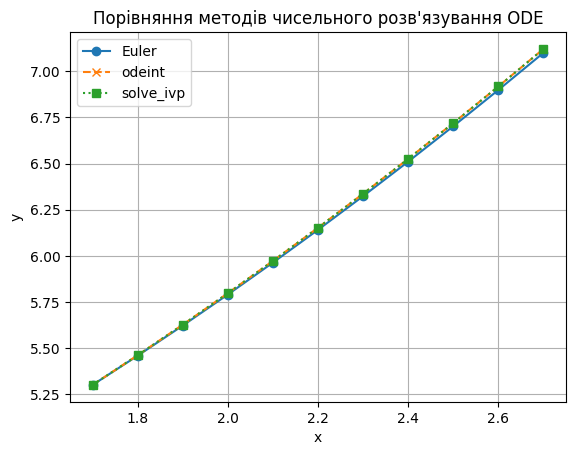

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

def f(x, y):
    return x + np.cos(y / np.pi)

a, b, h, y0 = 1.7, 2.7, 0.1, 5.3

if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

# Метод Ейлера
n = int((b - a) / h)
x = np.array([a + i * h for i in range(n + 1)])
y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)

# Перевірка odeint
def f_odeint(y, x):
    return x + np.cos(y / np.pi)

y_odeint = odeint(f_odeint, y0, x).flatten()

# Перевірка solve_ivp
def f_solve_ivp(t, y):
    return t + np.cos(y / np.pi)

sol = solve_ivp(f_solve_ivp, (a, b), [y0], t_eval=x)
y_solve_ivp = sol.y[0]

print("Метод Ейлера:")
print("x =", x)
print("y =", y_rounded)

print("\nodeint:")
print("y =", np.round(y_odeint, 4))

print("\nsolve_ivp:")
print("y =", np.round(y_solve_ivp, 4))

plt.plot(x, y, "o-", label="Euler")
plt.plot(x, y_odeint, "x--", label="odeint")
plt.plot(x, y_solve_ivp, "s:", label="solve_ivp")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння методів чисельного розв'язування ODE")
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Додати перевірку odeint для першого завдання


In [ ]:
#додати перевірку solve_ivp для перешого завдання

#Метод Ейлера-Коші

x = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 
y = [0.6    0.7517 0.9118 1.0798 1.2552 1.4375 1.6262 1.8207 2.0205 2.225
 2.4336]


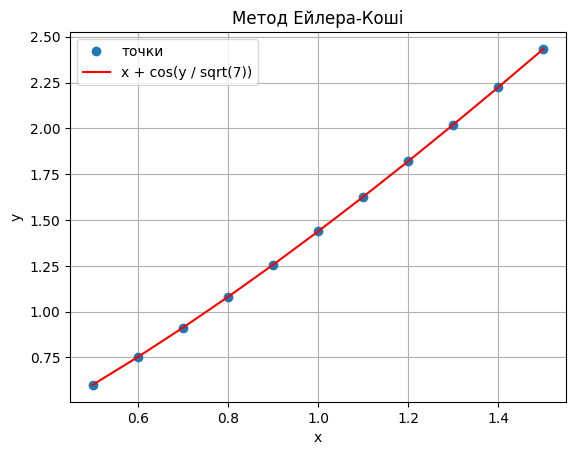

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y / np.sqrt(7))

a = 0.5  # ліва межа відрізку
b = 1.5  # права межа відрізку
h = 0.1  # крок
y0 = 0.6  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h, h)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "x + cos(y / sqrt(7))"])
plt.grid()
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x = [1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8]
y = [5.3    5.4609 5.6266 5.7972 5.9724 6.1523 6.3368 6.526  6.7198 6.9184
 7.1218 7.3302]


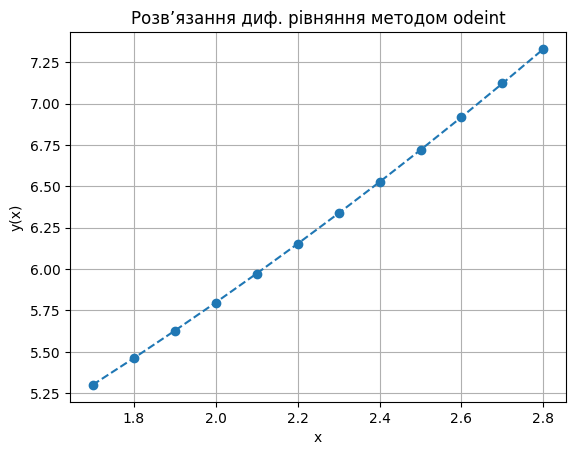

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.cos(y / np.pi)

# Початкова умова
y0 = 5.3

# Діапазон x з кроком h
a, b, h = 1.7, 2.7, 0.1
x = np.arange(a, b + h, h)  # включає b

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x =', x)
print('y =', np.round(y.flatten(), 4))  # округлення до 4 знаків

# Побудова графіка результатів
plt.plot(x, y, marker='o', linestyle='--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння методом odeint')
plt.grid()
plt.show()



#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x = [1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7]
y = [5.3    5.4609 5.6266 5.7972 5.9724 6.1523 6.3368 6.526  6.7198 6.9184
 7.1218]


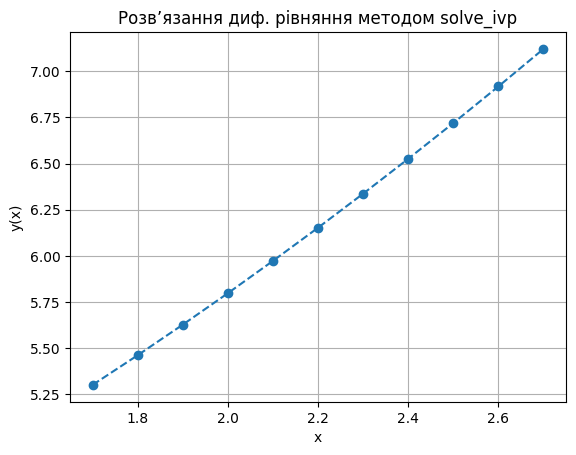

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.cos(y / np.pi)

# Початкова умова
y0 = [5.3]  # solve_ivp потребує список

# Діапазон x
a, b, h = 1.7, 2.7, 0.1
x = np.linspace(a, b, int((b - a) / h) + 1)  # np.arange замінено!

# Розв'язання ODE
sol = solve_ivp(model, (a, b), y0, t_eval=x)

# Виведення результатів
print('x =', sol.t)
print('y =', np.round(sol.y[0], 4))

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o', linestyle='--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння методом solve_ivp')
plt.grid()
plt.show()

